In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import TheilSenRegressor, RANSACRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
df = pd.read_csv("input/Australian Vehicle Prices.csv")
# print(df)

In [112]:
# errors{‘ignore’, ‘raise’, ‘coerce’}, default ‘raise’
# If ‘raise’, then invalid parsing will raise an exception.
# If ‘coerce’, then invalid parsing will be set as NaN.
# If ‘ignore’, then invalid parsing will return the input.
df['Kilometres'] = pd.to_numeric(df['Kilometres'], errors='coerce')
#type(df['Kilometres'][1])

In [114]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [116]:
df.size

317946

In [118]:
df = df.dropna(subset=['Kilometres', 'Price'])

In [120]:
df.size

306014

In [122]:
df = df[df['Kilometres'] >= 1000]
df.size

286178

In [124]:
df['Log_Kilometres'] = df['Kilometres'].apply(math.log10)
#print(df[['Log_Kilometres', 'Kilometres']] )


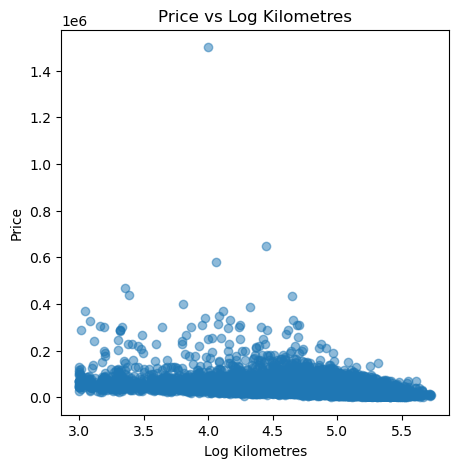

In [126]:
plt.figure(figsize=(5, 5))
plt.scatter(df['Log_Kilometres'], df['Price'], alpha=0.5)
plt.xlabel("Log Kilometres")
plt.ylabel("Price")
plt.title("Price vs Log Kilometres")
plt.savefig("price_vs_log_kilometres.png")
#plt.close()

In [ ]:
# Split: create training, valiation, and test sets as df
train, temp = train_test_split(df, test_size=0.4, random_state=42)
validation, test = train_test_split(temp, test_size=0.5, random_state=42)
theil_sen = TheilSenRegressor()
ransac = RANSACRegressor()

print(type(train[['Log_Kilometres']]))
print(type(train['Price']))

In [ ]:
# fit(X, y)
# X: ndarray of shape (n_samples, n_features)
# Training data, usually a dataframe/2D Numpy array
# y: ndarray of shape (n_samples,)
# Target values, usually a Series or 1D array
theil_sen.fit(train[['Log_Kilometres']], train['Price'])
ransac.fit(train[['Log_Kilometres']], train['Price'])
validation['Pred_Theil'] = theil_sen.predict(validation[['Log_Kilometres']])
validation['Pred_RANSAC'] = ransac.predict(validation[['Log_Kilometres']])
print("Validation Results:")
print(f"Theil-Sen - MAE: {mean_absolute_error(validation['Price'], validation['Pred_Theil']):.2f}")

In [ ]:
if r2_score(validation['Price'], validation['Pred_Theil']) > r2_score(validation['Price'], validation['Pred_RANSAC']):
    best_model = theil_sen
    best_model_name = "Theil_sen"
    best_coef = theil_sen.coef_[0]
else:
    best_model = ransac
    best_model_name = "RANSAC"
    best_coef = ransac.estimator_.coef_[0]

test['Prediction'] = best_model.predict(test[['Log_Kilometres']])
print(f"MAE: {mean_absolute_error(test['Price'], test['Prediction']):.2f}")
print(f"MSE: {mean_squared_error(test['Price'], test['Prediction']):.2f}")
print(f"R-squared: {r2_score(test['Price'], test['Prediction']):.2f}")

In [ ]:
print("\nCoefficient on Log Kilometres:")
print(f"{best_model_name}: {best_coef}")

In [ ]:
theil_sen

In [ ]:
# sklearn Linear regression example
import pandas as pd
from sklearn.linear_model import LinearRegression

# Sample dataset
data = {'Feature1': [1, 2, 3.5, 4, 3.66923],
        'Feature2': [2, 45132512521, 6, 8, 10]}

target = [1, 31234, 5, 7343, 9]

# Convert to DataFrame and Series
X = pd.DataFrame(data)  # Features
print(X)

y = pd.Series(target)   # Target labels
print(y)


In [ ]:
# Initialize and fit model
model = LinearRegression()
model.fit(X, y)  # Train the model

# Predict
print(model.predict([[6, 12]]))  # Example prediction

In [ ]:
fig = plt.figure(figsize=(8, 8))
fig3d = fig.add_subplot(projection='3d')
# fig3d.scatter(X['Feature1'], X['Feature2'], list(range(5)))
fig3d.set_xlabel('Feature1')
fig3d.set_ylabel('Feature2')
fig3d.set_zlabel('y')
fig3d.scatter(X['Feature1'], X['Feature2'], y)

In [ ]:
# Split data example
from sklearn.model_selection import train_test_split

# Sample dataset
X = [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]]
y = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Split into training + validation (80%) and test (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split training + validation into training (70%) and validation (30%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")